In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/EVA4/session13')


In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [4]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/EVA4/session13/*

'/content/gdrive/My Drive/Colab Notebooks/EVA4/session13/yolov3_assignment13.ipynb'

'/content/gdrive/My Drive/Colab Notebooks/EVA4/session13/YoloV3':
 annotation_tool   output	  runs		    'ubdivisions=1'
 cfg		   __pycache__	  test_batch0.png    utils
 data		   README.md	  test.py	     vim.exe.stackdump
 data_old	   results.json   ting		     weights
 detect.py	   results.png	  train_batch0.png
 models.py	   results.txt	  train.py


In [5]:
cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA4/session13/YoloV3/

/content/gdrive/My Drive/Colab Notebooks/EVA4/session13/YoloV3


In [6]:
!ls

 annotation_tool   output	  runs		    'ubdivisions=1'
 cfg		   __pycache__	  test_batch0.png    utils
 data		   README.md	  test.py	     vim.exe.stackdump
 data_old	   results.json   ting		     weights
 detect.py	   results.png	  train_batch0.png
 models.py	   results.txt	  train.py


In [7]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-05-01 11:27:56.463718: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (397 found, 0 missing, 50 empty, 0 duplicate, for 447 images): 100% 447/447 [00:00<00:00, 1132.76it/s]
Caching images (0.2GB):  67% 298/447 [00:01<00:00, 272.41it/s]libpng warning: iCCP: known incorrect sRGB profile
Caching images (0.2GB):  73% 326/447

In [8]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/495 data/customdata/images/img0.jpg: 512x512 1 popeyes, Done. (0.020s)
image 2/495 data/customdata/images/img1.jpg: 448x512 1 popeyes, Done. (0.019s)
image 3/495 data/customdata/images/img10.jpg: 384x512 1 popeyes, Done. (0.017s)
image 4/495 data/customdata/images/img100.jpg: 512x512 1 popeyes, Done. (0.020s)
image 5/495 data/customdata/images/img101.jpg: 320x512 1 popeyes, Done. (0.016s)
image 6/495 data/customdata/images/img102.jpg: 512x512 1 popeyes, Done. (0.020s)
image 7/495 data/customdata/images

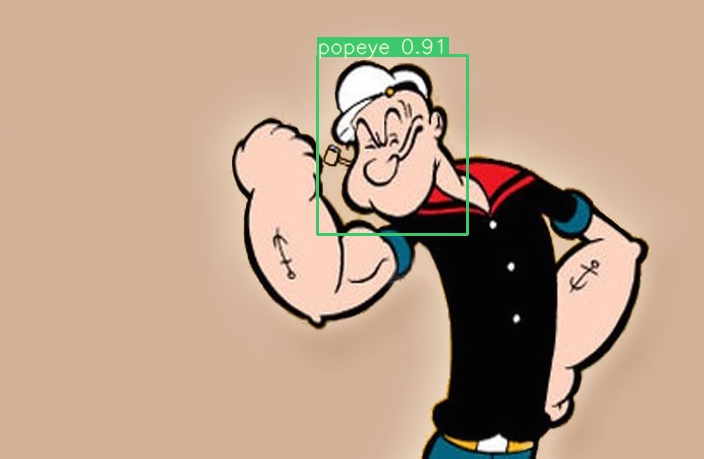

In [13]:
Image(filename='out_out/img444.jpg', width=600)

In [14]:
!python detect.py --conf-thres 0.1 --source /content/gdrive/My\ Drive/Colab\ Notebooks/EVA4/session13/YoloV3/image_from_video --output popeye_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='popeye_out', save_txt=False, source='/content/gdrive/My Drive/Colab Notebooks/EVA4/session13/YoloV3/image_from_video', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/1209 /content/gdrive/My Drive/Colab Notebooks/EVA4/session13/YoloV3/image_from_video/popeye_001.png: 384x512 1 popeyes, Done. (0.017s)
image 2/1209 /content/gdrive/My Drive/Colab Notebooks/EVA4/session13/YoloV3/image_from_video/popeye_002.png: 384x512 1 popeyes, Done. (0.017s)
image 3/1209 /content/gdrive/My Drive/Colab Notebooks/EVA4/session13/YoloV3/image_from_video/popeye_003.png: 384x512 1 popeyes, Done. (0.017s)
image 4/1209 /content/gdri

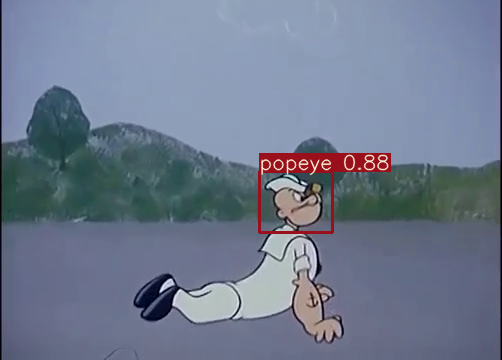

In [16]:
Image(filename='popeye_out/popeye_999.png', width=600)